Load Julia packages (libraries) needed

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChain
gr(size=(500,800));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "03")
cd(ProjDir)

Define the Stan language model

In [3]:
binomialstanmodel = "
// Inferring a Rate
data {
  int N;
  int<lower=0> k[N];
  int<lower=1> n[N];
}
parameters {
  real<lower=0,upper=1> theta;
  real<lower=0,upper=1> thetaprior;
}
model {
  // Prior Distribution for Rate Theta
  theta ~ beta(1, 1);
  thetaprior ~ beta(1, 1);

  // Observed Counts
  k ~ binomial(n, theta);
}
";

Define the Stanmodel and set the output format to :mcmcchain.

In [4]:
stanmodel = Stanmodel(name="binomial", monitors = ["theta"], model=binomialstanmodel,
  output_format=:mcmcchain);
# Use 16 observations
N2 = 4^2
d = Binomial(9, 0.66)
n2 = Int.(9 * ones(Int, N2))
k2 = rand(d, N2);


File /Users/rob/.julia/dev/StatisticalRethinking/scripts/03/tmp/binomial.stan will be updated.



Input data for cmdstan

In [5]:
binomialdata = Dict("N" => length(n2), "n" => n2, "k" => k2);

Sample using cmdstan

In [6]:
rc, chn, cnames = stan(stanmodel, binomialdata, ProjDir, diagnostics=false,
  CmdStanDir=CMDSTAN_HOME);
# Describe the draws
describe(chn)


Inference for Stan model: binomial_model
4 chains: each with iter=(1000,1000,1000,1000); warmup=(0,0,0,0); thin=(1,1,1,1); 4000 iterations saved.

Warmup took (0.028, 0.029, 0.029, 0.028) seconds, 0.11 seconds total
Sampling took (0.046, 0.039, 0.042, 0.039) seconds, 0.17 seconds total

                Mean     MCSE  StdDev     5%   50%   95%    N_Eff  N_Eff/s    R_hat
lp__             -98  2.7e-02     1.1   -100   -97   -97  1.6e+03  9.5e+03  1.0e+00
accept_stat__   0.89  2.0e-03    0.14   0.60  0.95   1.0  4.7e+03  2.8e+04  1.0e+00
stepsize__      0.88  4.2e-02   0.060   0.81  0.93  0.95  2.0e+00  1.2e+01  3.9e+13
treedepth__      1.9  1.7e-02    0.57    1.0   2.0   3.0  1.1e+03  6.5e+03  1.0e+00
n_leapfrog__     4.0  2.0e-01     4.2    1.0   3.0    11  4.2e+02  2.5e+03  1.0e+00
divergent__     0.00      nan    0.00   0.00  0.00  0.00      nan      nan      nan
energy__          99  4.2e-02     1.5     97    98   102  1.3e+03  7.8e+03  1.0e+00
theta           0.64  6.7e-04   0.040  

Plot the 4 chains

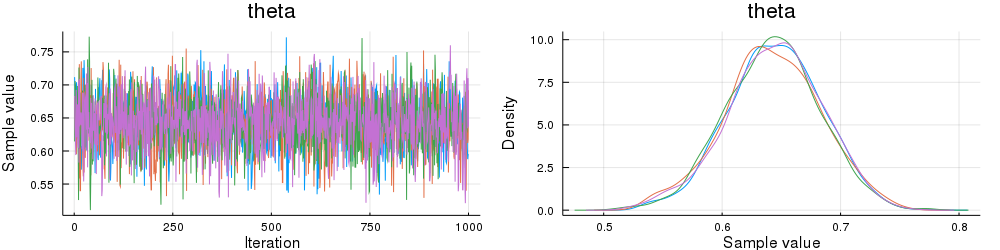

In [7]:
if rc == 0
  plot(chn)
end

End of `clip_05s.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*